# LifeWatch publication Statistics per special collection

This jupyter notebook contains general summary statistics relating to scientific publications of special collections within the LifeWatch project. 

Import packages and load the data

In [8]:
# Load necessary libraries and functions
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Specify location of data:
datafolder = "LW_publications_standardized" 
datafiles = ["LWpubs_stand_0_500.csv", 
             "LWpubs_stand_500_1000.csv", 
             "LWpubs_stand_1000_1500.csv", 
             "LWpubs_stand_1500_2000.csv", 
             "LWpubs_stand_2000_2500.csv",
             "LWpubs_stand_2500_3000.csv",
             "LWpubs_stand_3000_3500.csv",
             "LWpubs_stand_3500_4000.csv",
             "LWpubs_stand_4000_4500.csv",
             "LWpubs_stand_4500_5000.csv",
             "LWpubs_stand_5000_5500.csv",
             "LWpubs_stand_5500_6000.csv",
             "LWpubs_stand_6000_6227.csv"]

# Load data into single dataframe
appended_data = []
for datafile in datafiles:
    data_loc = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), datafolder, datafile)
    data = pd.read_csv(data_loc)
    data.rename(columns={'SortDate': 'Year'}, inplace=True)
    appended_data.append(data)
    
data = pd.concat(appended_data)

# Exclude publications from 2022:
data = data[data['Year']<2022]

# Set correct types
data['BrefID'] = data['BrefID'].astype("category")
data['Year'] = data['Year'].astype("category")
#data.info()

## Select a special collection

In [3]:
#list of the included special collections:
special_collections = [ 
'EUROBIS ackn - indirect use',
'European Oceanographic Biogeographic Information System (EurOBIS) acknowledged',
'Interim Register of Marine and Nonmarine Genera (IRMNG) acknowledged',
'Lifewatch acknowledged',
'LifeWatch Marine Data Archeology',
'LifeWatch Observatory',
'LifeWatch Species Information Backbone',
'Marine Regions acknowledged',
'World Register of Marine Species (WoRMS) acknowledged',
'WoRMS ackn - direct reference',
'Bio-ORACLE',
'EUROBIS ackn - direct reference',
'EUROBIS ackn - indirect use',
'European Oceanographic Biogeographic Information System (EurOBIS) acknowledged',
'Interim Register of Marine and Nonmarine Genera (IRMNG) acknowledged',
'Lifewatch acknowledged',
'LifeWatch Species Information Backbone',
'WoRMS ackn - direct reference'
]

In [4]:
#select the special collection
spcol = 'Lifewatch acknowledged'

# note: this doesn't work with multiple special collections

In [5]:
#select publications of specified special collection:
spcol_pubs = data[data['spcolNames'].str.contains(spcol)==True]

## Statistics about the selected special collection

### Number of publications

In [6]:
#select necessary columns & rename:
subset_spcol_pubs = spcol_pubs[['BrefID', 'Year']]
#summarize data - calculate number of publications:
pubs_summ = subset_spcol_pubs.groupby('Year', as_index=False).nunique('BrefID')
pubs_summ['BrefID_cuml'] = pubs_summ['BrefID'].cumsum()

# make into table
table1 = pubs_summ.set_index('Year').T
table1

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
BrefID,7,43,60,73,81,82,140,103,136,102
BrefID_cuml,7,50,110,183,264,346,486,589,725,827


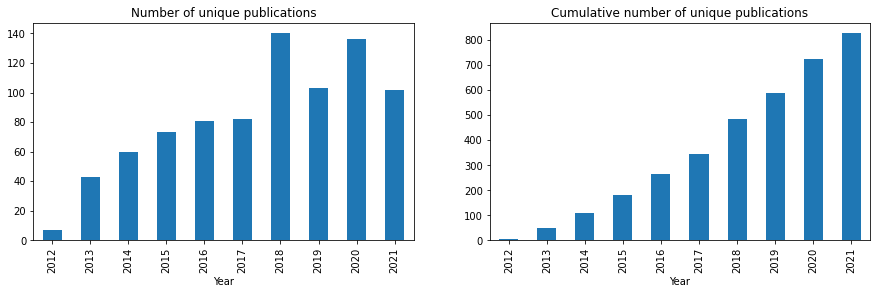

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
pubs_barplot = pubs_summ.plot(kind="bar", x='Year', y='BrefID', title="Number of unique publications", legend=False, ax=ax1)
cumm_pubs_barplot = pubs_summ.plot(kind="bar", x='Year', y='BrefID_cuml', title="Cumulative number of unique publications", legend=False, ax=ax2)

### Number of Affiliations

In [10]:
#select necessary columns:
subset = spcol_pubs[['BrefID', 'Year', 'Affiliation']]
#summarize data:
affil_summ = subset.groupby('Year', as_index=False).nunique('Affiliation')

#add 'average number of publications per affiliation'
affil_summ['Pubs/Affil'] = affil_summ['BrefID']/affil_summ['Affiliation']

#make into table
table2 = affil_summ.round(2).set_index('Year').T
table2

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
BrefID,7.0,43.0,60.0,73.00,81.00,82.00,140.0,103.00,136.00,102.00
Affiliation,2.0,10.0,20.0,20.00,20.00,18.00,25.0,22.00,28.00,14.00
Pubs/Affil,3.5,4.3,3.0,3.65,4.05,4.56,5.6,4.68,4.86,7.29


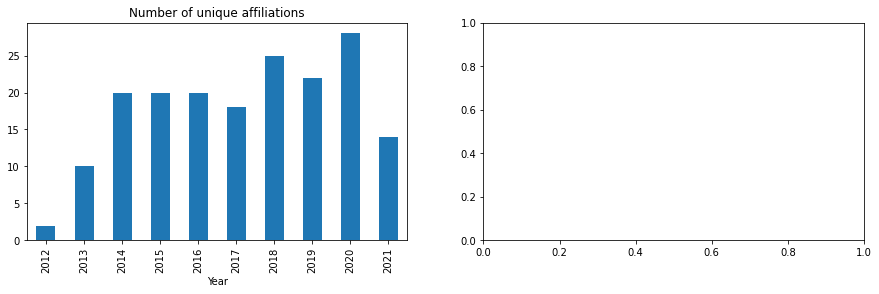

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4)) 
#bar-plot of affiliations (from scientific publications published in the respective year):
uniqaffil_barplot = affil_summ.plot(kind="bar", x='Year', y='Affiliation', title="Number of unique affiliations", legend=False, ax=ax1)

#### Number of new affiliations

In [12]:
# pivot table of publishing affiliation in publication years:
affils = spcol_pubs[['Year', 'Affiliation']].drop_duplicates(['Year', 'Affiliation'])
affils['values'] = "x"
affils_pivot = affils.pivot(index="Affiliation", columns="Year", values="values")

#summarize to dataframe to count new affiliations each year:
new_affils = pd.DataFrame()
new_affils.at['new_affiliations', 2012] = affils_pivot[2012].count()
new_affils.at['new_affiliations', 2013] = affils_pivot.loc[affils_pivot[2012].isna(), 2013].count()
new_affils.at['new_affiliations', 2014] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna()), 2014].count()
new_affils.at['new_affiliations', 2015] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna()), 2015].count()
new_affils.at['new_affiliations', 2016] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna()), 2016].count()
new_affils.at['new_affiliations', 2017] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna()), 2017].count()
new_affils.at['new_affiliations', 2018] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna()), 2018].count()
new_affils.at['new_affiliations', 2019] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna())&(affils_pivot[2018].isna()), 2019].count()
new_affils.at['new_affiliations', 2020] = affils_pivot.loc[(affils_pivot[2012].isna())&(affils_pivot[2013].isna())&(affils_pivot[2014].isna())&(affils_pivot[2015].isna())&(affils_pivot[2016].isna())&(affils_pivot[2017].isna())&(affils_pivot[2018].isna())&(affils_pivot[2019].isna()), 2020].count()

new_affils = new_affils.T.reset_index().rename(columns={'index': 'Year'})
new_affils['new_affiliations_cum'] = new_affils['new_affiliations'].cumsum()

In [13]:
table3 = new_affils.set_index('Year').T
table3

Year,2012,2013,2014,2015,2016,2017,2018,2019,2020
new_affiliations,3.0,10.0,16.0,14.0,16.0,8.0,19.0,16.0,18.0
new_affiliations_cum,3.0,13.0,29.0,43.0,59.0,67.0,86.0,102.0,120.0


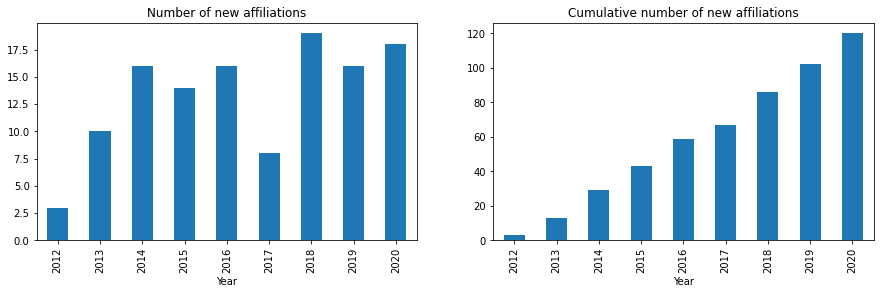

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
# bar-plot of new affiliations each publication year: 
fig4 = new_affils.plot(kind="bar", x='Year', y='new_affiliations', title="Number of new affiliations", legend=False, ax=ax1)

# cumulative bar-plot of new affiliations each publication year:
fig5 = new_affils.plot(kind="bar", x='Year', y='new_affiliations_cum', title="Cumulative number of new affiliations", legend=False, ax=ax2)

#### Average number of publications per affiliation:

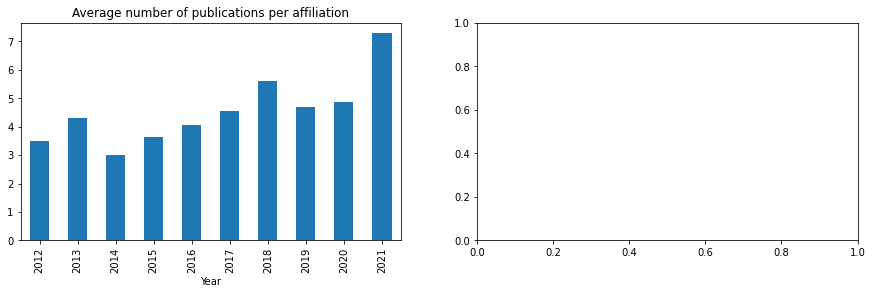

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,4)) 
fig6 = affil_summ.plot(kind="bar", x='Year', y='Pubs/Affil', title="Average number of publications per affiliation", legend=False, ax=ax1)